In [508]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [509]:
df = pd.read_excel('yandex_hack.xlsx')

# 1. Просмотрим данные

In [510]:
df.head()

,order_created_datetime,brand_name,rest_id,batched_with_order_id,order_id,first_in_multiorder_flg,courier_id,order_items_cnt,city
0,2015-09-15 21:08:43.000000,B,7cc98331ddb8ccffe464455f3df763d9,NaN,0b6f25c79b35fd1e6d28d845b7ee511d,NaN,3f1b96f620988a92d3409ea05e87bd36,3,c6fbacc5cab7e134c9db2a4bbfcc5b64
1,2015-09-13 18:40:12.000000,A,9b73035bb90cd7de4b9c1ff01e44f178,NaN,793f2fa9aa3d52d2da05caa3c30cb77e,NaN,8ed37467dc9b257b3b3bdc1bfebd9b28,8,e6705560085199e9674cd721ee844d0d
2,2015-09-14 01:52:40.000000,A,9b73035bb90cd7de4b9c1ff01e44f178,NaN,b6c5ec927a3e314b0900c103a0cd68fa,NaN,5b17547f825d9cf35c7853621dd842f8,1,e6705560085199e9674cd721ee844d0d
3,2015-09-13 17:23:52.000000,B,7cc98331ddb8ccffe464455f3df763d9,NaN,5dc658f0928569dbefac74c9f311031c,NaN,81647a72700bd46635d9606082360cc8,6,c6fbacc5cab7e134c9db2a4bbfcc5b64
4,2015-09-13 11:15:05.000000,B,7cc98331ddb8ccffe464455f3df763d9,NaN,3da09410aeab781baf4b7039fc9b125c,NaN,065c18216b6d3369d4cc36418c6e80f2,7,c6fbacc5cab7e134c9db2a4bbfcc5b64


In [511]:
df['order_created_datetime'] = pd.to_datetime(df['order_created_datetime'], format="%Y-%m-%d %H:%M:%S")
df['day'] = df['order_created_datetime'].dt.day
df['hour'] = df['order_created_datetime'].dt.hour

In [512]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66464 entries, 0 to 66463
Data columns (total 11 columns):
order_created_datetime     66464 non-null datetime64[ns]
brand_name                 66464 non-null object
rest_id                    66464 non-null object
batched_with_order_id      442 non-null object
order_id                   66464 non-null object
first_in_multiorder_flg    442 non-null float64
courier_id                 66202 non-null object
order_items_cnt            66464 non-null int64
city                       66464 non-null object
day                        66464 non-null int64
hour                       66464 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 5.6+ MB


Выводы
------

1. Есть пропуски в столбце courier_id. 
2. Есть пропуски в столбцах batched_with_order_id и first_in_multiorder_flg. Пропуски свидетельствует для группы рестаранов А то, что мультизаказов нет. Для группы рестаранов В необходимо дополнительно изучить.

In [513]:
dfA = df[df.brand_name == 'A']

In [514]:
dfA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9629 entries, 1 to 66463
Data columns (total 11 columns):
order_created_datetime     9629 non-null datetime64[ns]
brand_name                 9629 non-null object
rest_id                    9629 non-null object
batched_with_order_id      442 non-null object
order_id                   9629 non-null object
first_in_multiorder_flg    442 non-null float64
courier_id                 9437 non-null object
order_items_cnt            9629 non-null int64
city                       9629 non-null object
day                        9629 non-null int64
hour                       9629 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 902.7+ KB


In [515]:
dfA.describe()

,first_in_multiorder_flg,order_items_cnt,day,hour
count,442.000000,9629.00000,9629.000000,9629.000000
mean,0.500000,4.86333,14.002492,14.861460
std,0.500567,2.86872,0.933382,4.611396
min,0.000000,1.00000,13.000000,0.000000
25%,0.000000,3.00000,13.000000,12.000000
50%,0.500000,4.00000,14.000000,15.000000
75%,1.000000,6.00000,15.000000,18.000000
max,1.000000,35.00000,16.000000,23.000000


In [516]:
dfA.describe(include=['O'])

,brand_name,rest_id,batched_with_order_id,order_id,courier_id,city
count,9629,9629,442,9629,9437,9629
unique,1,518,442,9629,4034,30
top,A,9b73035bb90cd7de4b9c1ff01e44f178,384c618983509d6993a9c38327ab3ff7,39391b06846d043265c0b41536b0dead,5b17547f825d9cf35c7853621dd842f8,e6705560085199e9674cd721ee844d0d
freq,9629,107,1,1,643,4878


# 2. Просмотрим города, в которых есть рестораны А

In [517]:
cityA = dfA.city.value_counts()

In [518]:
for city in cityA.index:
    print('City ', city)
    dfA[dfA.city == city].info()
    print()

City  e6705560085199e9674cd721ee844d0d
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4878 entries, 1 to 66463
Data columns (total 11 columns):
order_created_datetime     4878 non-null datetime64[ns]
brand_name                 4878 non-null object
rest_id                    4878 non-null object
batched_with_order_id      442 non-null object
order_id                   4878 non-null object
first_in_multiorder_flg    442 non-null float64
courier_id                 4858 non-null object
order_items_cnt            4878 non-null int64
city                       4878 non-null object
day                        4878 non-null int64
hour                       4878 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 457.3+ KB

City  9a8fe36e44485af8b9e4b6352043555d
<class 'pandas.core.frame.DataFrame'>
Int64Index: 782 entries, 440 to 66342
Data columns (total 11 columns):
order_created_datetime     782 non-null datetime64[ns]
brand_name                 782 non

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173 entries, 657 to 66346
Data columns (total 11 columns):
order_created_datetime     173 non-null datetime64[ns]
brand_name                 173 non-null object
rest_id                    173 non-null object
batched_with_order_id      0 non-null object
order_id                   173 non-null object
first_in_multiorder_flg    0 non-null float64
courier_id                 169 non-null object
order_items_cnt            173 non-null int64
city                       173 non-null object
day                        173 non-null int64
hour                       173 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 16.2+ KB

City  a1e7db4b260a90afc36b94a13218eeb5
<class 'pandas.core.frame.DataFrame'>
Int64Index: 127 entries, 347 to 65724
Data columns (total 11 columns):
order_created_datetime     127 non-null datetime64[ns]
brand_name                 127 non-null object
rest_id                    127 non-null

Вывод
-----

 1. Рестораны сети А расположены в городе e6705560085199e9674cd721ee844d0d есть мультидоставка

In [519]:
dfA = dfA[dfA.city == 'e6705560085199e9674cd721ee844d0d']

In [520]:
dfA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4878 entries, 1 to 66463
Data columns (total 11 columns):
order_created_datetime     4878 non-null datetime64[ns]
brand_name                 4878 non-null object
rest_id                    4878 non-null object
batched_with_order_id      442 non-null object
order_id                   4878 non-null object
first_in_multiorder_flg    442 non-null float64
courier_id                 4858 non-null object
order_items_cnt            4878 non-null int64
city                       4878 non-null object
day                        4878 non-null int64
hour                       4878 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 457.3+ KB


In [521]:
dfA.describe(include=['O'])

,brand_name,rest_id,batched_with_order_id,order_id,courier_id,city
count,4878,4878,442,4878,4858,4878
unique,1,206,442,4878,2438,1
top,A,9b73035bb90cd7de4b9c1ff01e44f178,67a0e37266f6afb7ce2093825c8b9c72,39391b06846d043265c0b41536b0dead,5b17547f825d9cf35c7853621dd842f8,e6705560085199e9674cd721ee844d0d
freq,4878,107,1,1,414,4878


In [522]:
dfA.order_created_datetime.describe()

count                    4878
unique                   4814
top       2015-09-13 16:31:32
freq                        3
first     2015-09-13 00:00:05
last      2015-09-16 10:56:00
Name: order_created_datetime, dtype: object

In [523]:
dfA.describe()

,first_in_multiorder_flg,order_items_cnt,day,hour
count,442.000000,4878.000000,4878.00000,4878.000000
mean,0.500000,4.789668,13.98237,15.220992
std,0.500567,2.860727,0.90637,5.067471
min,0.000000,1.000000,13.00000,0.000000
25%,0.000000,3.000000,13.00000,12.000000
50%,0.500000,4.000000,14.00000,16.000000
75%,1.000000,6.000000,15.00000,19.000000
max,1.000000,33.000000,16.00000,23.000000


# 3. Просмотрим сколько курьеров выполняют мультипоставки 

In [524]:
courierA = dfA['courier_id'].value_counts()

In [525]:
for courier in dfA['courier_id'].value_counts().index:
    print('courier_id ', courier)
    dfA[dfA.courier_id == courier].info()
    print()

courier_id  5b17547f825d9cf35c7853621dd842f8
<class 'pandas.core.frame.DataFrame'>
Int64Index: 414 entries, 2 to 65188
Data columns (total 11 columns):
order_created_datetime     414 non-null datetime64[ns]
brand_name                 414 non-null object
rest_id                    414 non-null object
batched_with_order_id      0 non-null object
order_id                   414 non-null object
first_in_multiorder_flg    0 non-null float64
courier_id                 414 non-null object
order_items_cnt            414 non-null int64
city                       414 non-null object
day                        414 non-null int64
hour                       414 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 38.8+ KB

courier_id  d016782f2092ef2b2f943e736ececced
<class 'pandas.core.frame.DataFrame'>
Int64Index: 136 entries, 362 to 65867
Data columns (total 11 columns):
order_created_datetime     136 non-null datetime64[ns]
brand_name                 136 non-nu

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 29141 to 29402
Data columns (total 11 columns):
order_created_datetime     5 non-null datetime64[ns]
brand_name                 5 non-null object
rest_id                    5 non-null object
batched_with_order_id      0 non-null object
order_id                   5 non-null object
first_in_multiorder_flg    0 non-null float64
courier_id                 5 non-null object
order_items_cnt            5 non-null int64
city                       5 non-null object
day                        5 non-null int64
hour                       5 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 480.0+ bytes

courier_id  d9ba96f31504a9c705be6e9314cd6381
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 2656 to 50612
Data columns (total 11 columns):
order_created_datetime     5 non-null datetime64[ns]
brand_name                 5 non-null object
rest_id                    5 non-null object
batched


courier_id  a0e2d3e2bf5d0af07d8beef2c959846a
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 342 to 38362
Data columns (total 11 columns):
order_created_datetime     5 non-null datetime64[ns]
brand_name                 5 non-null object
rest_id                    5 non-null object
batched_with_order_id      0 non-null object
order_id                   5 non-null object
first_in_multiorder_flg    0 non-null float64
courier_id                 5 non-null object
order_items_cnt            5 non-null int64
city                       5 non-null object
day                        5 non-null int64
hour                       5 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 480.0+ bytes

courier_id  3bb0f042ed862817c9939e0b29b3eeb7
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 29666 to 29843
Data columns (total 11 columns):
order_created_datetime     5 non-null datetime64[ns]
brand_name                 5 non-null object
rest_id


courier_id  1de8a9e16566c5ab08f478c6103b5dba
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 23062 to 29088
Data columns (total 11 columns):
order_created_datetime     4 non-null datetime64[ns]
brand_name                 4 non-null object
rest_id                    4 non-null object
batched_with_order_id      2 non-null object
order_id                   4 non-null object
first_in_multiorder_flg    2 non-null float64
courier_id                 4 non-null object
order_items_cnt            4 non-null int64
city                       4 non-null object
day                        4 non-null int64
hour                       4 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 384.0+ bytes

courier_id  cc22fc3c7ada6c223d6cf168601440fc
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 28720 to 63237
Data columns (total 11 columns):
order_created_datetime     4 non-null datetime64[ns]
brand_name                 4 non-null object
rest_

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 3642 to 60524
Data columns (total 11 columns):
order_created_datetime     4 non-null datetime64[ns]
brand_name                 4 non-null object
rest_id                    4 non-null object
batched_with_order_id      0 non-null object
order_id                   4 non-null object
first_in_multiorder_flg    0 non-null float64
courier_id                 4 non-null object
order_items_cnt            4 non-null int64
city                       4 non-null object
day                        4 non-null int64
hour                       4 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 384.0+ bytes

courier_id  7bd6a696958b8d650954ab44a45ddf49
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 9765 to 63486
Data columns (total 11 columns):
order_created_datetime     4 non-null datetime64[ns]
brand_name                 4 non-null object
rest_id                    4 non-null object
batched_

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 35767 to 36358
Data columns (total 11 columns):
order_created_datetime     4 non-null datetime64[ns]
brand_name                 4 non-null object
rest_id                    4 non-null object
batched_with_order_id      2 non-null object
order_id                   4 non-null object
first_in_multiorder_flg    2 non-null float64
courier_id                 4 non-null object
order_items_cnt            4 non-null int64
city                       4 non-null object
day                        4 non-null int64
hour                       4 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 384.0+ bytes

courier_id  625521eec15d348dddcaee29274d080d
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 5452 to 24461
Data columns (total 11 columns):
order_created_datetime     4 non-null datetime64[ns]
brand_name                 4 non-null object
rest_id                    4 non-null object
batched


courier_id  77b8d8c74d30535008da1aaf4c872b61
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 241 to 61358
Data columns (total 11 columns):
order_created_datetime     3 non-null datetime64[ns]
brand_name                 3 non-null object
rest_id                    3 non-null object
batched_with_order_id      0 non-null object
order_id                   3 non-null object
first_in_multiorder_flg    0 non-null float64
courier_id                 3 non-null object
order_items_cnt            3 non-null int64
city                       3 non-null object
day                        3 non-null int64
hour                       3 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 288.0+ bytes

courier_id  3962850bd3ed554081094654aa58ef81
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 34433 to 38369
Data columns (total 11 columns):
order_created_datetime     3 non-null datetime64[ns]
brand_name                 3 non-null object
rest_id


courier_id  c6dd07db8eb8a20f480239392e68d147
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 2706 to 38823
Data columns (total 11 columns):
order_created_datetime     3 non-null datetime64[ns]
brand_name                 3 non-null object
rest_id                    3 non-null object
batched_with_order_id      0 non-null object
order_id                   3 non-null object
first_in_multiorder_flg    0 non-null float64
courier_id                 3 non-null object
order_items_cnt            3 non-null int64
city                       3 non-null object
day                        3 non-null int64
hour                       3 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 288.0+ bytes

courier_id  cea9e2b2cf7a80d2cafed36e81d56dde
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 14183 to 32403
Data columns (total 11 columns):
order_created_datetime     3 non-null datetime64[ns]
brand_name                 3 non-null object
rest_i


courier_id  36ff5644cbd7901d09f615e1509907b5
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 28748 to 63308
Data columns (total 11 columns):
order_created_datetime     3 non-null datetime64[ns]
brand_name                 3 non-null object
rest_id                    3 non-null object
batched_with_order_id      0 non-null object
order_id                   3 non-null object
first_in_multiorder_flg    0 non-null float64
courier_id                 3 non-null object
order_items_cnt            3 non-null int64
city                       3 non-null object
day                        3 non-null int64
hour                       3 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 288.0+ bytes

courier_id  0aa1564dceb2e6dfe6d0a8374c9f876e
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 14823 to 15506
Data columns (total 11 columns):
order_created_datetime     3 non-null datetime64[ns]
brand_name                 3 non-null object
rest_


courier_id  e28628b85ea19efdc64170dad8172a25
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 16826 to 63257
Data columns (total 11 columns):
order_created_datetime     3 non-null datetime64[ns]
brand_name                 3 non-null object
rest_id                    3 non-null object
batched_with_order_id      0 non-null object
order_id                   3 non-null object
first_in_multiorder_flg    0 non-null float64
courier_id                 3 non-null object
order_items_cnt            3 non-null int64
city                       3 non-null object
day                        3 non-null int64
hour                       3 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 288.0+ bytes

courier_id  519d6271207ea4d3f5497311c4f6e09d
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 5539 to 60640
Data columns (total 11 columns):
order_created_datetime     3 non-null datetime64[ns]
brand_name                 3 non-null object
rest_i

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 19073 to 19269
Data columns (total 11 columns):
order_created_datetime     3 non-null datetime64[ns]
brand_name                 3 non-null object
rest_id                    3 non-null object
batched_with_order_id      0 non-null object
order_id                   3 non-null object
first_in_multiorder_flg    0 non-null float64
courier_id                 3 non-null object
order_items_cnt            3 non-null int64
city                       3 non-null object
day                        3 non-null int64
hour                       3 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 288.0+ bytes

courier_id  d2110fe251c6f9ed486bc254e89f3a09
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 1813 to 34422
Data columns (total 11 columns):
order_created_datetime     3 non-null datetime64[ns]
brand_name                 3 non-null object
rest_id                    3 non-null object
batched


courier_id  c92607289dc5d71684857b1cd75bdee6
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 49396 to 49856
Data columns (total 11 columns):
order_created_datetime     3 non-null datetime64[ns]
brand_name                 3 non-null object
rest_id                    3 non-null object
batched_with_order_id      0 non-null object
order_id                   3 non-null object
first_in_multiorder_flg    0 non-null float64
courier_id                 3 non-null object
order_items_cnt            3 non-null int64
city                       3 non-null object
day                        3 non-null int64
hour                       3 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 288.0+ bytes

courier_id  1aa29cf22aa2193d21373a50251e9a4f
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 25514 to 25535
Data columns (total 11 columns):
order_created_datetime     3 non-null datetime64[ns]
brand_name                 3 non-null object
rest_

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 29961 to 32162
Data columns (total 11 columns):
order_created_datetime     3 non-null datetime64[ns]
brand_name                 3 non-null object
rest_id                    3 non-null object
batched_with_order_id      0 non-null object
order_id                   3 non-null object
first_in_multiorder_flg    0 non-null float64
courier_id                 3 non-null object
order_items_cnt            3 non-null int64
city                       3 non-null object
day                        3 non-null int64
hour                       3 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 288.0+ bytes

courier_id  16f84997f9263447b935b8b2a6977270
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 26999 to 52563
Data columns (total 11 columns):
order_created_datetime     3 non-null datetime64[ns]
brand_name                 3 non-null object
rest_id                    3 non-null object
batche


courier_id  11ce78ab36e37ad1eab5122c2b950c72
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 754 to 41684
Data columns (total 11 columns):
order_created_datetime     3 non-null datetime64[ns]
brand_name                 3 non-null object
rest_id                    3 non-null object
batched_with_order_id      0 non-null object
order_id                   3 non-null object
first_in_multiorder_flg    0 non-null float64
courier_id                 3 non-null object
order_items_cnt            3 non-null int64
city                       3 non-null object
day                        3 non-null int64
hour                       3 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 288.0+ bytes

courier_id  f112216e7d17e104977928c2f4c5f273
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 19136 to 35241
Data columns (total 11 columns):
order_created_datetime     3 non-null datetime64[ns]
brand_name                 3 non-null object
rest_id

courier_id  f88c342634d10f41b9a832d075ab8fea
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 34434 to 35507
Data columns (total 11 columns):
order_created_datetime     3 non-null datetime64[ns]
brand_name                 3 non-null object
rest_id                    3 non-null object
batched_with_order_id      0 non-null object
order_id                   3 non-null object
first_in_multiorder_flg    0 non-null float64
courier_id                 3 non-null object
order_items_cnt            3 non-null int64
city                       3 non-null object
day                        3 non-null int64
hour                       3 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 288.0+ bytes

courier_id  dcf3a43086b997080b56cd8c4b517ed7
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 19473 to 19812
Data columns (total 11 columns):
order_created_datetime     3 non-null datetime64[ns]
brand_name                 3 non-null object
rest_i


courier_id  ab1209377b2197f7155a00414e2d1984
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 8689 to 41026
Data columns (total 11 columns):
order_created_datetime     3 non-null datetime64[ns]
brand_name                 3 non-null object
rest_id                    3 non-null object
batched_with_order_id      0 non-null object
order_id                   3 non-null object
first_in_multiorder_flg    0 non-null float64
courier_id                 3 non-null object
order_items_cnt            3 non-null int64
city                       3 non-null object
day                        3 non-null int64
hour                       3 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 288.0+ bytes

courier_id  33e3d40df039c81a4033b5a70556efa7
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 21809 to 62298
Data columns (total 11 columns):
order_created_datetime     2 non-null datetime64[ns]
brand_name                 2 non-null object
rest_i


courier_id  2d15e56b58d1fa56a1a8797d8e563dfd
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 2454 to 64744
Data columns (total 11 columns):
order_created_datetime     2 non-null datetime64[ns]
brand_name                 2 non-null object
rest_id                    2 non-null object
batched_with_order_id      0 non-null object
order_id                   2 non-null object
first_in_multiorder_flg    0 non-null float64
courier_id                 2 non-null object
order_items_cnt            2 non-null int64
city                       2 non-null object
day                        2 non-null int64
hour                       2 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 192.0+ bytes

courier_id  86859aac9d27563f67edd8a7514fcdae
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 22604 to 22628
Data columns (total 11 columns):
order_created_datetime     2 non-null datetime64[ns]
brand_name                 2 non-null object
rest_i


courier_id  db7f7e4f55c63b6fc956b27808c757c9
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 60676 to 60708
Data columns (total 11 columns):
order_created_datetime     2 non-null datetime64[ns]
brand_name                 2 non-null object
rest_id                    2 non-null object
batched_with_order_id      0 non-null object
order_id                   2 non-null object
first_in_multiorder_flg    0 non-null float64
courier_id                 2 non-null object
order_items_cnt            2 non-null int64
city                       2 non-null object
day                        2 non-null int64
hour                       2 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 192.0+ bytes

courier_id  f953409f1e6e66ae094505b2d19f59a5
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 24351 to 24475
Data columns (total 11 columns):
order_created_datetime     2 non-null datetime64[ns]
brand_name                 2 non-null object
rest_


courier_id  5150989a7323850ad772143fd3c6ca20
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 19376 to 64758
Data columns (total 11 columns):
order_created_datetime     2 non-null datetime64[ns]
brand_name                 2 non-null object
rest_id                    2 non-null object
batched_with_order_id      0 non-null object
order_id                   2 non-null object
first_in_multiorder_flg    0 non-null float64
courier_id                 2 non-null object
order_items_cnt            2 non-null int64
city                       2 non-null object
day                        2 non-null int64
hour                       2 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 192.0+ bytes

courier_id  d2560e4b673a828e67d4eaa9c88a6775
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 5471 to 60749
Data columns (total 11 columns):
order_created_datetime     2 non-null datetime64[ns]
brand_name                 2 non-null object
rest_i

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 27095 to 27488
Data columns (total 11 columns):
order_created_datetime     2 non-null datetime64[ns]
brand_name                 2 non-null object
rest_id                    2 non-null object
batched_with_order_id      0 non-null object
order_id                   2 non-null object
first_in_multiorder_flg    0 non-null float64
courier_id                 2 non-null object
order_items_cnt            2 non-null int64
city                       2 non-null object
day                        2 non-null int64
hour                       2 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 192.0+ bytes

courier_id  87d8b7f5b4681d137f2345cbfcd232aa
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 47258 to 65582
Data columns (total 11 columns):
order_created_datetime     2 non-null datetime64[ns]
brand_name                 2 non-null object
rest_id                    2 non-null object
batche

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 27138 to 27266
Data columns (total 11 columns):
order_created_datetime     2 non-null datetime64[ns]
brand_name                 2 non-null object
rest_id                    2 non-null object
batched_with_order_id      0 non-null object
order_id                   2 non-null object
first_in_multiorder_flg    0 non-null float64
courier_id                 2 non-null object
order_items_cnt            2 non-null int64
city                       2 non-null object
day                        2 non-null int64
hour                       2 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 192.0+ bytes

courier_id  99706640073a1d1ebba1ae0e00f6c0fb
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 18505 to 66262
Data columns (total 11 columns):
order_created_datetime     2 non-null datetime64[ns]
brand_name                 2 non-null object
rest_id                    2 non-null object
batche


courier_id  931a9aa0d3e31a018d8b6e4cb0831573
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 5781 to 60532
Data columns (total 11 columns):
order_created_datetime     2 non-null datetime64[ns]
brand_name                 2 non-null object
rest_id                    2 non-null object
batched_with_order_id      2 non-null object
order_id                   2 non-null object
first_in_multiorder_flg    2 non-null float64
courier_id                 2 non-null object
order_items_cnt            2 non-null int64
city                       2 non-null object
day                        2 non-null int64
hour                       2 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 192.0+ bytes

courier_id  c3d886736250b57f14dbe80289b32333
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 24937 to 25113
Data columns (total 11 columns):
order_created_datetime     2 non-null datetime64[ns]
brand_name                 2 non-null object
rest_i

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 6977 to 28492
Data columns (total 11 columns):
order_created_datetime     2 non-null datetime64[ns]
brand_name                 2 non-null object
rest_id                    2 non-null object
batched_with_order_id      0 non-null object
order_id                   2 non-null object
first_in_multiorder_flg    0 non-null float64
courier_id                 2 non-null object
order_items_cnt            2 non-null int64
city                       2 non-null object
day                        2 non-null int64
hour                       2 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 192.0+ bytes

courier_id  3bacff5b903f19371a30a0dc0e160fc6
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 39157 to 57122
Data columns (total 11 columns):
order_created_datetime     2 non-null datetime64[ns]
brand_name                 2 non-null object
rest_id                    2 non-null object
batched

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 8860 to 63331
Data columns (total 11 columns):
order_created_datetime     2 non-null datetime64[ns]
brand_name                 2 non-null object
rest_id                    2 non-null object
batched_with_order_id      2 non-null object
order_id                   2 non-null object
first_in_multiorder_flg    2 non-null float64
courier_id                 2 non-null object
order_items_cnt            2 non-null int64
city                       2 non-null object
day                        2 non-null int64
hour                       2 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 192.0+ bytes

courier_id  a7ea3b9b84553638f38d39ebda1b4f7e
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 42685 to 43215
Data columns (total 11 columns):
order_created_datetime     2 non-null datetime64[ns]
brand_name                 2 non-null object
rest_id                    2 non-null object
batched

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 34800 to 35190
Data columns (total 11 columns):
order_created_datetime     2 non-null datetime64[ns]
brand_name                 2 non-null object
rest_id                    2 non-null object
batched_with_order_id      0 non-null object
order_id                   2 non-null object
first_in_multiorder_flg    0 non-null float64
courier_id                 2 non-null object
order_items_cnt            2 non-null int64
city                       2 non-null object
day                        2 non-null int64
hour                       2 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 192.0+ bytes

courier_id  41bfe56ca7fafdd7b3bd180017eee489
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 21862 to 22176
Data columns (total 11 columns):
order_created_datetime     2 non-null datetime64[ns]
brand_name                 2 non-null object
rest_id                    2 non-null object
batche


courier_id  c798a4ec4a2788681959d1e3ffa48764
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 18370 to 18711
Data columns (total 11 columns):
order_created_datetime     2 non-null datetime64[ns]
brand_name                 2 non-null object
rest_id                    2 non-null object
batched_with_order_id      0 non-null object
order_id                   2 non-null object
first_in_multiorder_flg    0 non-null float64
courier_id                 2 non-null object
order_items_cnt            2 non-null int64
city                       2 non-null object
day                        2 non-null int64
hour                       2 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 192.0+ bytes

courier_id  bd08a195e9747d5932188883c0d0f5f4
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 28897 to 29004
Data columns (total 11 columns):
order_created_datetime     2 non-null datetime64[ns]
brand_name                 2 non-null object
rest_


courier_id  2828595f63a40f82eecdaace794f2948
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 39702 to 40129
Data columns (total 11 columns):
order_created_datetime     2 non-null datetime64[ns]
brand_name                 2 non-null object
rest_id                    2 non-null object
batched_with_order_id      2 non-null object
order_id                   2 non-null object
first_in_multiorder_flg    2 non-null float64
courier_id                 2 non-null object
order_items_cnt            2 non-null int64
city                       2 non-null object
day                        2 non-null int64
hour                       2 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 192.0+ bytes

courier_id  e72a9d552cc5a25d649c5cdfdd16b2bc
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 22999 to 23129
Data columns (total 11 columns):
order_created_datetime     2 non-null datetime64[ns]
brand_name                 2 non-null object
rest_

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 28000 to 37462
Data columns (total 11 columns):
order_created_datetime     2 non-null datetime64[ns]
brand_name                 2 non-null object
rest_id                    2 non-null object
batched_with_order_id      0 non-null object
order_id                   2 non-null object
first_in_multiorder_flg    0 non-null float64
courier_id                 2 non-null object
order_items_cnt            2 non-null int64
city                       2 non-null object
day                        2 non-null int64
hour                       2 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 192.0+ bytes

courier_id  50207c6687c33c9f003ffcbc76deec09
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 46081 to 46476
Data columns (total 11 columns):
order_created_datetime     2 non-null datetime64[ns]
brand_name                 2 non-null object
rest_id                    2 non-null object
batche


courier_id  d7830e6598b7869e608b76bb0c3fc533
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 6799 to 9458
Data columns (total 11 columns):
order_created_datetime     2 non-null datetime64[ns]
brand_name                 2 non-null object
rest_id                    2 non-null object
batched_with_order_id      0 non-null object
order_id                   2 non-null object
first_in_multiorder_flg    0 non-null float64
courier_id                 2 non-null object
order_items_cnt            2 non-null int64
city                       2 non-null object
day                        2 non-null int64
hour                       2 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 192.0+ bytes

courier_id  5a7342b325400997a2a8d99ba6b4c2af
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 18966 to 35440
Data columns (total 11 columns):
order_created_datetime     2 non-null datetime64[ns]
brand_name                 2 non-null object
rest_id

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 28454 to 42828
Data columns (total 11 columns):
order_created_datetime     2 non-null datetime64[ns]
brand_name                 2 non-null object
rest_id                    2 non-null object
batched_with_order_id      0 non-null object
order_id                   2 non-null object
first_in_multiorder_flg    0 non-null float64
courier_id                 2 non-null object
order_items_cnt            2 non-null int64
city                       2 non-null object
day                        2 non-null int64
hour                       2 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 192.0+ bytes

courier_id  28a20e4bb78232f2bd1edcf55e97e190
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 12472 to 31863
Data columns (total 11 columns):
order_created_datetime     2 non-null datetime64[ns]
brand_name                 2 non-null object
rest_id                    2 non-null object
batche


courier_id  fe12285f47a9223dc7ab44636092534e
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 43998 to 44125
Data columns (total 11 columns):
order_created_datetime     2 non-null datetime64[ns]
brand_name                 2 non-null object
rest_id                    2 non-null object
batched_with_order_id      2 non-null object
order_id                   2 non-null object
first_in_multiorder_flg    2 non-null float64
courier_id                 2 non-null object
order_items_cnt            2 non-null int64
city                       2 non-null object
day                        2 non-null int64
hour                       2 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 192.0+ bytes

courier_id  82bb5af035fd24aa96e15d66aae8af49
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 21887 to 62576
Data columns (total 11 columns):
order_created_datetime     2 non-null datetime64[ns]
brand_name                 2 non-null object
rest_

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 19091 to 19203
Data columns (total 11 columns):
order_created_datetime     2 non-null datetime64[ns]
brand_name                 2 non-null object
rest_id                    2 non-null object
batched_with_order_id      0 non-null object
order_id                   2 non-null object
first_in_multiorder_flg    0 non-null float64
courier_id                 2 non-null object
order_items_cnt            2 non-null int64
city                       2 non-null object
day                        2 non-null int64
hour                       2 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 192.0+ bytes

courier_id  b67d5f1f29763b29e0f85d990361f638
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 54240 to 55298
Data columns (total 11 columns):
order_created_datetime     2 non-null datetime64[ns]
brand_name                 2 non-null object
rest_id                    2 non-null object
batche


courier_id  20e96ac2d8d7bd041dcc17e3023f2e87
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 22344 to 32322
Data columns (total 11 columns):
order_created_datetime     2 non-null datetime64[ns]
brand_name                 2 non-null object
rest_id                    2 non-null object
batched_with_order_id      0 non-null object
order_id                   2 non-null object
first_in_multiorder_flg    0 non-null float64
courier_id                 2 non-null object
order_items_cnt            2 non-null int64
city                       2 non-null object
day                        2 non-null int64
hour                       2 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 192.0+ bytes

courier_id  3828d9d604591eb4e070d69cb9796b2d
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 5328 to 12787
Data columns (total 11 columns):
order_created_datetime     2 non-null datetime64[ns]
brand_name                 2 non-null object
rest_i

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 47340 to 63979
Data columns (total 11 columns):
order_created_datetime     2 non-null datetime64[ns]
brand_name                 2 non-null object
rest_id                    2 non-null object
batched_with_order_id      0 non-null object
order_id                   2 non-null object
first_in_multiorder_flg    0 non-null float64
courier_id                 2 non-null object
order_items_cnt            2 non-null int64
city                       2 non-null object
day                        2 non-null int64
hour                       2 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 192.0+ bytes

courier_id  3443b8febbcb2d9f870936ab8cf55977
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 46065 to 49794
Data columns (total 11 columns):
order_created_datetime     2 non-null datetime64[ns]
brand_name                 2 non-null object
rest_id                    2 non-null object
batche


courier_id  481baf184bba7cafca163da85bede7bb
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 10123 to 10123
Data columns (total 11 columns):
order_created_datetime     1 non-null datetime64[ns]
brand_name                 1 non-null object
rest_id                    1 non-null object
batched_with_order_id      0 non-null object
order_id                   1 non-null object
first_in_multiorder_flg    0 non-null float64
courier_id                 1 non-null object
order_items_cnt            1 non-null int64
city                       1 non-null object
day                        1 non-null int64
hour                       1 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 96.0+ bytes

courier_id  db46aa1784c53221cb755911da221fe8
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 38216 to 38216
Data columns (total 11 columns):
order_created_datetime     1 non-null datetime64[ns]
brand_name                 1 non-null object
rest_i


courier_id  cf90fb85c02647dc762596c92d989020
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 60312 to 60312
Data columns (total 11 columns):
order_created_datetime     1 non-null datetime64[ns]
brand_name                 1 non-null object
rest_id                    1 non-null object
batched_with_order_id      0 non-null object
order_id                   1 non-null object
first_in_multiorder_flg    0 non-null float64
courier_id                 1 non-null object
order_items_cnt            1 non-null int64
city                       1 non-null object
day                        1 non-null int64
hour                       1 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 96.0+ bytes

courier_id  3d21153bdc3c5f26508a591b8504e141
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 4886 to 4886
Data columns (total 11 columns):
order_created_datetime     1 non-null datetime64[ns]
brand_name                 1 non-null object
rest_id 


courier_id  c76ec988c8b257e2fae665c22d56489d
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 6380 to 6380
Data columns (total 11 columns):
order_created_datetime     1 non-null datetime64[ns]
brand_name                 1 non-null object
rest_id                    1 non-null object
batched_with_order_id      0 non-null object
order_id                   1 non-null object
first_in_multiorder_flg    0 non-null float64
courier_id                 1 non-null object
order_items_cnt            1 non-null int64
city                       1 non-null object
day                        1 non-null int64
hour                       1 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 96.0+ bytes

courier_id  160aeaab203adab079fc52e7c78c0792
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 13279 to 13279
Data columns (total 11 columns):
order_created_datetime     1 non-null datetime64[ns]
brand_name                 1 non-null object
rest_id 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 58983 to 58983
Data columns (total 11 columns):
order_created_datetime     1 non-null datetime64[ns]
brand_name                 1 non-null object
rest_id                    1 non-null object
batched_with_order_id      0 non-null object
order_id                   1 non-null object
first_in_multiorder_flg    0 non-null float64
courier_id                 1 non-null object
order_items_cnt            1 non-null int64
city                       1 non-null object
day                        1 non-null int64
hour                       1 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 96.0+ bytes

courier_id  19aff22969e7ff511d78f799c733b952
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 3656 to 3656
Data columns (total 11 columns):
order_created_datetime     1 non-null datetime64[ns]
brand_name                 1 non-null object
rest_id                    1 non-null object
batched_w


courier_id  709f92ae7bb751e8a65aa18a41fcbe79
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 31952 to 31952
Data columns (total 11 columns):
order_created_datetime     1 non-null datetime64[ns]
brand_name                 1 non-null object
rest_id                    1 non-null object
batched_with_order_id      0 non-null object
order_id                   1 non-null object
first_in_multiorder_flg    0 non-null float64
courier_id                 1 non-null object
order_items_cnt            1 non-null int64
city                       1 non-null object
day                        1 non-null int64
hour                       1 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 96.0+ bytes

courier_id  8ee8e9f0995dd757a18caf365467a165
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 39261 to 39261
Data columns (total 11 columns):
order_created_datetime     1 non-null datetime64[ns]
brand_name                 1 non-null object
rest_i


courier_id  71550604e95fde78c3d1df30d3934a06
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 41620 to 41620
Data columns (total 11 columns):
order_created_datetime     1 non-null datetime64[ns]
brand_name                 1 non-null object
rest_id                    1 non-null object
batched_with_order_id      0 non-null object
order_id                   1 non-null object
first_in_multiorder_flg    0 non-null float64
courier_id                 1 non-null object
order_items_cnt            1 non-null int64
city                       1 non-null object
day                        1 non-null int64
hour                       1 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 96.0+ bytes

courier_id  8d856696fb3db6432ecc72a89bb78643
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 50578 to 50578
Data columns (total 11 columns):
order_created_datetime     1 non-null datetime64[ns]
brand_name                 1 non-null object
rest_i


courier_id  141852f9bfa08ba64fb4e7436ea1ec99
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 32943 to 32943
Data columns (total 11 columns):
order_created_datetime     1 non-null datetime64[ns]
brand_name                 1 non-null object
rest_id                    1 non-null object
batched_with_order_id      0 non-null object
order_id                   1 non-null object
first_in_multiorder_flg    0 non-null float64
courier_id                 1 non-null object
order_items_cnt            1 non-null int64
city                       1 non-null object
day                        1 non-null int64
hour                       1 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 96.0+ bytes

courier_id  bcd6b25dc8213168fbf04af9b9e09743
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 15891 to 15891
Data columns (total 11 columns):
order_created_datetime     1 non-null datetime64[ns]
brand_name                 1 non-null object
rest_i

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 49404 to 49404
Data columns (total 11 columns):
order_created_datetime     1 non-null datetime64[ns]
brand_name                 1 non-null object
rest_id                    1 non-null object
batched_with_order_id      0 non-null object
order_id                   1 non-null object
first_in_multiorder_flg    0 non-null float64
courier_id                 1 non-null object
order_items_cnt            1 non-null int64
city                       1 non-null object
day                        1 non-null int64
hour                       1 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 96.0+ bytes

courier_id  cf28613b24f8b1930439cc2f82de6f97
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 6518 to 6518
Data columns (total 11 columns):
order_created_datetime     1 non-null datetime64[ns]
brand_name                 1 non-null object
rest_id                    1 non-null object
batched_w


courier_id  9b8043c134df6b13b9996ce5c70d2397
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 35255 to 35255
Data columns (total 11 columns):
order_created_datetime     1 non-null datetime64[ns]
brand_name                 1 non-null object
rest_id                    1 non-null object
batched_with_order_id      0 non-null object
order_id                   1 non-null object
first_in_multiorder_flg    0 non-null float64
courier_id                 1 non-null object
order_items_cnt            1 non-null int64
city                       1 non-null object
day                        1 non-null int64
hour                       1 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 96.0+ bytes

courier_id  098a59079c45c0a4b16cb1514945e7de
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 5311 to 5311
Data columns (total 11 columns):
order_created_datetime     1 non-null datetime64[ns]
brand_name                 1 non-null object
rest_id 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 30568 to 30568
Data columns (total 11 columns):
order_created_datetime     1 non-null datetime64[ns]
brand_name                 1 non-null object
rest_id                    1 non-null object
batched_with_order_id      0 non-null object
order_id                   1 non-null object
first_in_multiorder_flg    0 non-null float64
courier_id                 1 non-null object
order_items_cnt            1 non-null int64
city                       1 non-null object
day                        1 non-null int64
hour                       1 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 96.0+ bytes

courier_id  3fb3c88b4c455980aa0b53c302887645
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 15406 to 15406
Data columns (total 11 columns):
order_created_datetime     1 non-null datetime64[ns]
brand_name                 1 non-null object
rest_id                    1 non-null object
batched

courier_id  1912afb12855ea71d6e71ba1af6a2b59
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 63289 to 63289
Data columns (total 11 columns):
order_created_datetime     1 non-null datetime64[ns]
brand_name                 1 non-null object
rest_id                    1 non-null object
batched_with_order_id      0 non-null object
order_id                   1 non-null object
first_in_multiorder_flg    0 non-null float64
courier_id                 1 non-null object
order_items_cnt            1 non-null int64
city                       1 non-null object
day                        1 non-null int64
hour                       1 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 96.0+ bytes

courier_id  bd76aed6c6b43b3f37e47bb36aa9784c
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 58879 to 58879
Data columns (total 11 columns):
order_created_datetime     1 non-null datetime64[ns]
brand_name                 1 non-null object
rest_id


courier_id  d965f172578b0c66893e9700ef5feadf
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 25248 to 25248
Data columns (total 11 columns):
order_created_datetime     1 non-null datetime64[ns]
brand_name                 1 non-null object
rest_id                    1 non-null object
batched_with_order_id      0 non-null object
order_id                   1 non-null object
first_in_multiorder_flg    0 non-null float64
courier_id                 1 non-null object
order_items_cnt            1 non-null int64
city                       1 non-null object
day                        1 non-null int64
hour                       1 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 96.0+ bytes

courier_id  98df2f954df4797e43064af59f10502b
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 47233 to 47233
Data columns (total 11 columns):
order_created_datetime     1 non-null datetime64[ns]
brand_name                 1 non-null object
rest_i

courier_id  b4392afe21cc622dc0293da6d0927084
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 63575 to 63575
Data columns (total 11 columns):
order_created_datetime     1 non-null datetime64[ns]
brand_name                 1 non-null object
rest_id                    1 non-null object
batched_with_order_id      0 non-null object
order_id                   1 non-null object
first_in_multiorder_flg    0 non-null float64
courier_id                 1 non-null object
order_items_cnt            1 non-null int64
city                       1 non-null object
day                        1 non-null int64
hour                       1 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 96.0+ bytes

courier_id  548a9cf3318045e58ee18212364dedea
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 1800 to 1800
Data columns (total 11 columns):
order_created_datetime     1 non-null datetime64[ns]
brand_name                 1 non-null object
rest_id  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 3100 to 3100
Data columns (total 11 columns):
order_created_datetime     1 non-null datetime64[ns]
brand_name                 1 non-null object
rest_id                    1 non-null object
batched_with_order_id      0 non-null object
order_id                   1 non-null object
first_in_multiorder_flg    0 non-null float64
courier_id                 1 non-null object
order_items_cnt            1 non-null int64
city                       1 non-null object
day                        1 non-null int64
hour                       1 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 96.0+ bytes

courier_id  1f343d446fdfa310179a1729ab71f3a9
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 24921 to 24921
Data columns (total 11 columns):
order_created_datetime     1 non-null datetime64[ns]
brand_name                 1 non-null object
rest_id                    1 non-null object
batched_w

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 36723 to 36723
Data columns (total 11 columns):
order_created_datetime     1 non-null datetime64[ns]
brand_name                 1 non-null object
rest_id                    1 non-null object
batched_with_order_id      0 non-null object
order_id                   1 non-null object
first_in_multiorder_flg    0 non-null float64
courier_id                 1 non-null object
order_items_cnt            1 non-null int64
city                       1 non-null object
day                        1 non-null int64
hour                       1 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 96.0+ bytes

courier_id  8480cee79d9d62c0c01cbc6bc395ec6f
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 2034 to 2034
Data columns (total 11 columns):
order_created_datetime     1 non-null datetime64[ns]
brand_name                 1 non-null object
rest_id                    1 non-null object
batched_w


courier_id  71c5fe9bcebc0a598a956ec65dbb1d62
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 26244 to 26244
Data columns (total 11 columns):
order_created_datetime     1 non-null datetime64[ns]
brand_name                 1 non-null object
rest_id                    1 non-null object
batched_with_order_id      0 non-null object
order_id                   1 non-null object
first_in_multiorder_flg    0 non-null float64
courier_id                 1 non-null object
order_items_cnt            1 non-null int64
city                       1 non-null object
day                        1 non-null int64
hour                       1 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 96.0+ bytes

courier_id  078cd5742fe707904dda46bb6d5eb846
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 42441 to 42441
Data columns (total 11 columns):
order_created_datetime     1 non-null datetime64[ns]
brand_name                 1 non-null object
rest_i

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 30293 to 30293
Data columns (total 11 columns):
order_created_datetime     1 non-null datetime64[ns]
brand_name                 1 non-null object
rest_id                    1 non-null object
batched_with_order_id      0 non-null object
order_id                   1 non-null object
first_in_multiorder_flg    0 non-null float64
courier_id                 1 non-null object
order_items_cnt            1 non-null int64
city                       1 non-null object
day                        1 non-null int64
hour                       1 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 96.0+ bytes

courier_id  3a6861b3bef3a3e36bb81902c3eed3a8
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 21947 to 21947
Data columns (total 11 columns):
order_created_datetime     1 non-null datetime64[ns]
brand_name                 1 non-null object
rest_id                    1 non-null object
batched

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 28334 to 28334
Data columns (total 11 columns):
order_created_datetime     1 non-null datetime64[ns]
brand_name                 1 non-null object
rest_id                    1 non-null object
batched_with_order_id      0 non-null object
order_id                   1 non-null object
first_in_multiorder_flg    0 non-null float64
courier_id                 1 non-null object
order_items_cnt            1 non-null int64
city                       1 non-null object
day                        1 non-null int64
hour                       1 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 96.0+ bytes

courier_id  9a676a7460512ee4d46159ad1f9ec161
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 19030 to 19030
Data columns (total 11 columns):
order_created_datetime     1 non-null datetime64[ns]
brand_name                 1 non-null object
rest_id                    1 non-null object
batched


courier_id  4cfc8212305a6937015999efb9a656fd
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 43163 to 43163
Data columns (total 11 columns):
order_created_datetime     1 non-null datetime64[ns]
brand_name                 1 non-null object
rest_id                    1 non-null object
batched_with_order_id      0 non-null object
order_id                   1 non-null object
first_in_multiorder_flg    0 non-null float64
courier_id                 1 non-null object
order_items_cnt            1 non-null int64
city                       1 non-null object
day                        1 non-null int64
hour                       1 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 96.0+ bytes

courier_id  72c8f8ba6851b797c34c3889ce9ce5bc
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 25315 to 25315
Data columns (total 11 columns):
order_created_datetime     1 non-null datetime64[ns]
brand_name                 1 non-null object
rest_i


courier_id  807baf89d8569692043e01905b386f08
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 56751 to 56751
Data columns (total 11 columns):
order_created_datetime     1 non-null datetime64[ns]
brand_name                 1 non-null object
rest_id                    1 non-null object
batched_with_order_id      0 non-null object
order_id                   1 non-null object
first_in_multiorder_flg    0 non-null float64
courier_id                 1 non-null object
order_items_cnt            1 non-null int64
city                       1 non-null object
day                        1 non-null int64
hour                       1 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 96.0+ bytes

courier_id  dca7947ead7703350b2b40c3563f9d59
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 7101 to 7101
Data columns (total 11 columns):
order_created_datetime     1 non-null datetime64[ns]
brand_name                 1 non-null object
rest_id 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 22882 to 22882
Data columns (total 11 columns):
order_created_datetime     1 non-null datetime64[ns]
brand_name                 1 non-null object
rest_id                    1 non-null object
batched_with_order_id      0 non-null object
order_id                   1 non-null object
first_in_multiorder_flg    0 non-null float64
courier_id                 1 non-null object
order_items_cnt            1 non-null int64
city                       1 non-null object
day                        1 non-null int64
hour                       1 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 96.0+ bytes

courier_id  aa1ab0a3f17b24ad13f74416df03c3dd
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 40140 to 40140
Data columns (total 11 columns):
order_created_datetime     1 non-null datetime64[ns]
brand_name                 1 non-null object
rest_id                    1 non-null object
batched

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 7158 to 7158
Data columns (total 11 columns):
order_created_datetime     1 non-null datetime64[ns]
brand_name                 1 non-null object
rest_id                    1 non-null object
batched_with_order_id      0 non-null object
order_id                   1 non-null object
first_in_multiorder_flg    0 non-null float64
courier_id                 1 non-null object
order_items_cnt            1 non-null int64
city                       1 non-null object
day                        1 non-null int64
hour                       1 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 96.0+ bytes

courier_id  5a1585d0d057aec8d417ba15b8e21b63
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 9135 to 9135
Data columns (total 11 columns):
order_created_datetime     1 non-null datetime64[ns]
brand_name                 1 non-null object
rest_id                    1 non-null object
batched_wit


courier_id  85cb74d35d1e85f4533eabfae47e3f02
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 37886 to 37886
Data columns (total 11 columns):
order_created_datetime     1 non-null datetime64[ns]
brand_name                 1 non-null object
rest_id                    1 non-null object
batched_with_order_id      0 non-null object
order_id                   1 non-null object
first_in_multiorder_flg    0 non-null float64
courier_id                 1 non-null object
order_items_cnt            1 non-null int64
city                       1 non-null object
day                        1 non-null int64
hour                       1 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 96.0+ bytes

courier_id  18f3fc7696883f3428b63bfcc7024fce
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 39176 to 39176
Data columns (total 11 columns):
order_created_datetime     1 non-null datetime64[ns]
brand_name                 1 non-null object
rest_i


courier_id  0830ade090b181440f8f291c851160dd
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 64446 to 64446
Data columns (total 11 columns):
order_created_datetime     1 non-null datetime64[ns]
brand_name                 1 non-null object
rest_id                    1 non-null object
batched_with_order_id      0 non-null object
order_id                   1 non-null object
first_in_multiorder_flg    0 non-null float64
courier_id                 1 non-null object
order_items_cnt            1 non-null int64
city                       1 non-null object
day                        1 non-null int64
hour                       1 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 96.0+ bytes

courier_id  fc59f95b18e464d8d579b2116071bb3f
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 16301 to 16301
Data columns (total 11 columns):
order_created_datetime     1 non-null datetime64[ns]
brand_name                 1 non-null object
rest_i


courier_id  d20ec9df07c0805c55f03a316b42013a
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 55168 to 55168
Data columns (total 11 columns):
order_created_datetime     1 non-null datetime64[ns]
brand_name                 1 non-null object
rest_id                    1 non-null object
batched_with_order_id      0 non-null object
order_id                   1 non-null object
first_in_multiorder_flg    0 non-null float64
courier_id                 1 non-null object
order_items_cnt            1 non-null int64
city                       1 non-null object
day                        1 non-null int64
hour                       1 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 96.0+ bytes

courier_id  4d0c42e6113f2e1af6235e08703524fe
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 21630 to 21630
Data columns (total 11 columns):
order_created_datetime     1 non-null datetime64[ns]
brand_name                 1 non-null object
rest_i


courier_id  0d6089f10d5e1b42eb3237b5a974a70b
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 39561 to 39561
Data columns (total 11 columns):
order_created_datetime     1 non-null datetime64[ns]
brand_name                 1 non-null object
rest_id                    1 non-null object
batched_with_order_id      0 non-null object
order_id                   1 non-null object
first_in_multiorder_flg    0 non-null float64
courier_id                 1 non-null object
order_items_cnt            1 non-null int64
city                       1 non-null object
day                        1 non-null int64
hour                       1 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 96.0+ bytes

courier_id  5727e9d54244d8022bb7f8925d907cdd
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 38972 to 38972
Data columns (total 11 columns):
order_created_datetime     1 non-null datetime64[ns]
brand_name                 1 non-null object
rest_i


courier_id  c581064332dfa2f5cb70cd92a9fe6b2e
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 39973 to 39973
Data columns (total 11 columns):
order_created_datetime     1 non-null datetime64[ns]
brand_name                 1 non-null object
rest_id                    1 non-null object
batched_with_order_id      0 non-null object
order_id                   1 non-null object
first_in_multiorder_flg    0 non-null float64
courier_id                 1 non-null object
order_items_cnt            1 non-null int64
city                       1 non-null object
day                        1 non-null int64
hour                       1 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 96.0+ bytes

courier_id  c3d4dffbc42442417a3c4976324a7dcd
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 19172 to 19172
Data columns (total 11 columns):
order_created_datetime     1 non-null datetime64[ns]
brand_name                 1 non-null object
rest_i


courier_id  47087444a3196923904c96e58c7a4904
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 42264 to 42264
Data columns (total 11 columns):
order_created_datetime     1 non-null datetime64[ns]
brand_name                 1 non-null object
rest_id                    1 non-null object
batched_with_order_id      0 non-null object
order_id                   1 non-null object
first_in_multiorder_flg    0 non-null float64
courier_id                 1 non-null object
order_items_cnt            1 non-null int64
city                       1 non-null object
day                        1 non-null int64
hour                       1 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 96.0+ bytes

courier_id  4416db87aab37b7ee43b325fc33e49c0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 13868 to 13868
Data columns (total 11 columns):
order_created_datetime     1 non-null datetime64[ns]
brand_name                 1 non-null object
rest_i


courier_id  895af5cfa9f349da343673d50e36a063
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 38888 to 38888
Data columns (total 11 columns):
order_created_datetime     1 non-null datetime64[ns]
brand_name                 1 non-null object
rest_id                    1 non-null object
batched_with_order_id      0 non-null object
order_id                   1 non-null object
first_in_multiorder_flg    0 non-null float64
courier_id                 1 non-null object
order_items_cnt            1 non-null int64
city                       1 non-null object
day                        1 non-null int64
hour                       1 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 96.0+ bytes

courier_id  6fbd7a3edbe03286d7bb2cf82d0d7402
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 41161 to 41161
Data columns (total 11 columns):
order_created_datetime     1 non-null datetime64[ns]
brand_name                 1 non-null object
rest_i


courier_id  5714a6357535c5628bd7df50093c953f
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 139 to 139
Data columns (total 11 columns):
order_created_datetime     1 non-null datetime64[ns]
brand_name                 1 non-null object
rest_id                    1 non-null object
batched_with_order_id      0 non-null object
order_id                   1 non-null object
first_in_multiorder_flg    0 non-null float64
courier_id                 1 non-null object
order_items_cnt            1 non-null int64
city                       1 non-null object
day                        1 non-null int64
hour                       1 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 96.0+ bytes

courier_id  ad29f205ef599a7364ab3b72f0778b08
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 18249 to 18249
Data columns (total 11 columns):
order_created_datetime     1 non-null datetime64[ns]
brand_name                 1 non-null object
rest_id   


courier_id  3a9dc51898eb4afe0234c81b7543b480
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 35706 to 35706
Data columns (total 11 columns):
order_created_datetime     1 non-null datetime64[ns]
brand_name                 1 non-null object
rest_id                    1 non-null object
batched_with_order_id      0 non-null object
order_id                   1 non-null object
first_in_multiorder_flg    0 non-null float64
courier_id                 1 non-null object
order_items_cnt            1 non-null int64
city                       1 non-null object
day                        1 non-null int64
hour                       1 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 96.0+ bytes

courier_id  81dce33b7aa0243370c87dedbf372f65
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 66431 to 66431
Data columns (total 11 columns):
order_created_datetime     1 non-null datetime64[ns]
brand_name                 1 non-null object
rest_i


courier_id  54e276ded5355c449030975eaf6ba40c
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 64645 to 64645
Data columns (total 11 columns):
order_created_datetime     1 non-null datetime64[ns]
brand_name                 1 non-null object
rest_id                    1 non-null object
batched_with_order_id      0 non-null object
order_id                   1 non-null object
first_in_multiorder_flg    0 non-null float64
courier_id                 1 non-null object
order_items_cnt            1 non-null int64
city                       1 non-null object
day                        1 non-null int64
hour                       1 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 96.0+ bytes

courier_id  f8db3fa6151a1023bee464909076a6ec
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 35733 to 35733
Data columns (total 11 columns):
order_created_datetime     1 non-null datetime64[ns]
brand_name                 1 non-null object
rest_i


courier_id  1ce42f074ac922f064ea1cbaaa94c00e
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 16445 to 16445
Data columns (total 11 columns):
order_created_datetime     1 non-null datetime64[ns]
brand_name                 1 non-null object
rest_id                    1 non-null object
batched_with_order_id      0 non-null object
order_id                   1 non-null object
first_in_multiorder_flg    0 non-null float64
courier_id                 1 non-null object
order_items_cnt            1 non-null int64
city                       1 non-null object
day                        1 non-null int64
hour                       1 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 96.0+ bytes

courier_id  d336a5f46da66d4ffa9faaa581b8136b
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 21352 to 21352
Data columns (total 11 columns):
order_created_datetime     1 non-null datetime64[ns]
brand_name                 1 non-null object
rest_i


courier_id  cc287b8a500d05709d5ca5313b95dccd
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 18491 to 18491
Data columns (total 11 columns):
order_created_datetime     1 non-null datetime64[ns]
brand_name                 1 non-null object
rest_id                    1 non-null object
batched_with_order_id      0 non-null object
order_id                   1 non-null object
first_in_multiorder_flg    0 non-null float64
courier_id                 1 non-null object
order_items_cnt            1 non-null int64
city                       1 non-null object
day                        1 non-null int64
hour                       1 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 96.0+ bytes

courier_id  e75c90711f17a377656dd1e9453a144f
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 37551 to 37551
Data columns (total 11 columns):
order_created_datetime     1 non-null datetime64[ns]
brand_name                 1 non-null object
rest_i


courier_id  2e5cb57bef3d6c3424ed684c915e697e
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 37901 to 37901
Data columns (total 11 columns):
order_created_datetime     1 non-null datetime64[ns]
brand_name                 1 non-null object
rest_id                    1 non-null object
batched_with_order_id      0 non-null object
order_id                   1 non-null object
first_in_multiorder_flg    0 non-null float64
courier_id                 1 non-null object
order_items_cnt            1 non-null int64
city                       1 non-null object
day                        1 non-null int64
hour                       1 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 96.0+ bytes

courier_id  e1045a03453176e459e4c97f7607d458
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 28241 to 28241
Data columns (total 11 columns):
order_created_datetime     1 non-null datetime64[ns]
brand_name                 1 non-null object
rest_i


courier_id  2bd6ac8024c72a59727f592510991f2b
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 22014 to 22014
Data columns (total 11 columns):
order_created_datetime     1 non-null datetime64[ns]
brand_name                 1 non-null object
rest_id                    1 non-null object
batched_with_order_id      0 non-null object
order_id                   1 non-null object
first_in_multiorder_flg    0 non-null float64
courier_id                 1 non-null object
order_items_cnt            1 non-null int64
city                       1 non-null object
day                        1 non-null int64
hour                       1 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 96.0+ bytes

courier_id  7c28fb2d5aafb6aa577ab8a6722f73d3
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 22124 to 22124
Data columns (total 11 columns):
order_created_datetime     1 non-null datetime64[ns]
brand_name                 1 non-null object
rest_i

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 40444 to 40444
Data columns (total 11 columns):
order_created_datetime     1 non-null datetime64[ns]
brand_name                 1 non-null object
rest_id                    1 non-null object
batched_with_order_id      0 non-null object
order_id                   1 non-null object
first_in_multiorder_flg    0 non-null float64
courier_id                 1 non-null object
order_items_cnt            1 non-null int64
city                       1 non-null object
day                        1 non-null int64
hour                       1 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 96.0+ bytes

courier_id  559bbff0beb14ffff012898f1e9a7257
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 13373 to 13373
Data columns (total 11 columns):
order_created_datetime     1 non-null datetime64[ns]
brand_name                 1 non-null object
rest_id                    1 non-null object
batched

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 18963 to 18963
Data columns (total 11 columns):
order_created_datetime     1 non-null datetime64[ns]
brand_name                 1 non-null object
rest_id                    1 non-null object
batched_with_order_id      0 non-null object
order_id                   1 non-null object
first_in_multiorder_flg    0 non-null float64
courier_id                 1 non-null object
order_items_cnt            1 non-null int64
city                       1 non-null object
day                        1 non-null int64
hour                       1 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 96.0+ bytes

courier_id  b570bf670399a7f4f870327a706ceb7c
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 60672 to 60672
Data columns (total 11 columns):
order_created_datetime     1 non-null datetime64[ns]
brand_name                 1 non-null object
rest_id                    1 non-null object
batched


courier_id  7f068eab8325df6d41328dd5a5435b89
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 36827 to 36827
Data columns (total 11 columns):
order_created_datetime     1 non-null datetime64[ns]
brand_name                 1 non-null object
rest_id                    1 non-null object
batched_with_order_id      0 non-null object
order_id                   1 non-null object
first_in_multiorder_flg    0 non-null float64
courier_id                 1 non-null object
order_items_cnt            1 non-null int64
city                       1 non-null object
day                        1 non-null int64
hour                       1 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 96.0+ bytes

courier_id  76fe9c1c40baa836ddf5c4d4293aaf1b
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 28412 to 28412
Data columns (total 11 columns):
order_created_datetime     1 non-null datetime64[ns]
brand_name                 1 non-null object
rest_i


courier_id  014bda449c72adb91b6600c11643b93a
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 44729 to 44729
Data columns (total 11 columns):
order_created_datetime     1 non-null datetime64[ns]
brand_name                 1 non-null object
rest_id                    1 non-null object
batched_with_order_id      0 non-null object
order_id                   1 non-null object
first_in_multiorder_flg    0 non-null float64
courier_id                 1 non-null object
order_items_cnt            1 non-null int64
city                       1 non-null object
day                        1 non-null int64
hour                       1 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 96.0+ bytes

courier_id  0c341eaaa175f4be440230ce11857259
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 51909 to 51909
Data columns (total 11 columns):
order_created_datetime     1 non-null datetime64[ns]
brand_name                 1 non-null object
rest_i


courier_id  ac56068da71c2651001022bd6a171051
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 6466 to 6466
Data columns (total 11 columns):
order_created_datetime     1 non-null datetime64[ns]
brand_name                 1 non-null object
rest_id                    1 non-null object
batched_with_order_id      0 non-null object
order_id                   1 non-null object
first_in_multiorder_flg    0 non-null float64
courier_id                 1 non-null object
order_items_cnt            1 non-null int64
city                       1 non-null object
day                        1 non-null int64
hour                       1 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 96.0+ bytes

courier_id  ab2236b23b542cb2dc6f7647e16aff9c
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 12080 to 12080
Data columns (total 11 columns):
order_created_datetime     1 non-null datetime64[ns]
brand_name                 1 non-null object
rest_id 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 36452 to 36452
Data columns (total 11 columns):
order_created_datetime     1 non-null datetime64[ns]
brand_name                 1 non-null object
rest_id                    1 non-null object
batched_with_order_id      0 non-null object
order_id                   1 non-null object
first_in_multiorder_flg    0 non-null float64
courier_id                 1 non-null object
order_items_cnt            1 non-null int64
city                       1 non-null object
day                        1 non-null int64
hour                       1 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 96.0+ bytes

courier_id  0e0078caf02e1614ebaad8908e814863
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 37496 to 37496
Data columns (total 11 columns):
order_created_datetime     1 non-null datetime64[ns]
brand_name                 1 non-null object
rest_id                    1 non-null object
batched


courier_id  e8bd6c2dc50cc152e6547ac86c92ee29
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 16400 to 16400
Data columns (total 11 columns):
order_created_datetime     1 non-null datetime64[ns]
brand_name                 1 non-null object
rest_id                    1 non-null object
batched_with_order_id      0 non-null object
order_id                   1 non-null object
first_in_multiorder_flg    0 non-null float64
courier_id                 1 non-null object
order_items_cnt            1 non-null int64
city                       1 non-null object
day                        1 non-null int64
hour                       1 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 96.0+ bytes

courier_id  477ed5eca7b8c2b3bb8e37ab74e1dc79
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 5568 to 5568
Data columns (total 11 columns):
order_created_datetime     1 non-null datetime64[ns]
brand_name                 1 non-null object
rest_id 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 12342 to 12342
Data columns (total 11 columns):
order_created_datetime     1 non-null datetime64[ns]
brand_name                 1 non-null object
rest_id                    1 non-null object
batched_with_order_id      0 non-null object
order_id                   1 non-null object
first_in_multiorder_flg    0 non-null float64
courier_id                 1 non-null object
order_items_cnt            1 non-null int64
city                       1 non-null object
day                        1 non-null int64
hour                       1 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 96.0+ bytes

courier_id  8487b494c9af6c7935363ba008d2b790
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 36673 to 36673
Data columns (total 11 columns):
order_created_datetime     1 non-null datetime64[ns]
brand_name                 1 non-null object
rest_id                    1 non-null object
batched


courier_id  05bf0e1df10d2f0017390d7d7913ad3f
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 27911 to 27911
Data columns (total 11 columns):
order_created_datetime     1 non-null datetime64[ns]
brand_name                 1 non-null object
rest_id                    1 non-null object
batched_with_order_id      0 non-null object
order_id                   1 non-null object
first_in_multiorder_flg    0 non-null float64
courier_id                 1 non-null object
order_items_cnt            1 non-null int64
city                       1 non-null object
day                        1 non-null int64
hour                       1 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 96.0+ bytes

courier_id  77b55dada52d762e4f4fa61b8b9bb02c
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 12956 to 12956
Data columns (total 11 columns):
order_created_datetime     1 non-null datetime64[ns]
brand_name                 1 non-null object
rest_i

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 20028 to 20028
Data columns (total 11 columns):
order_created_datetime     1 non-null datetime64[ns]
brand_name                 1 non-null object
rest_id                    1 non-null object
batched_with_order_id      0 non-null object
order_id                   1 non-null object
first_in_multiorder_flg    0 non-null float64
courier_id                 1 non-null object
order_items_cnt            1 non-null int64
city                       1 non-null object
day                        1 non-null int64
hour                       1 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 96.0+ bytes

courier_id  ea8820ab0283bfb89ed31346722fa200
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 60222 to 60222
Data columns (total 11 columns):
order_created_datetime     1 non-null datetime64[ns]
brand_name                 1 non-null object
rest_id                    1 non-null object
batched


courier_id  f9f982b394e1ea4eaeddda73f27a612a
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 17024 to 17024
Data columns (total 11 columns):
order_created_datetime     1 non-null datetime64[ns]
brand_name                 1 non-null object
rest_id                    1 non-null object
batched_with_order_id      0 non-null object
order_id                   1 non-null object
first_in_multiorder_flg    0 non-null float64
courier_id                 1 non-null object
order_items_cnt            1 non-null int64
city                       1 non-null object
day                        1 non-null int64
hour                       1 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 96.0+ bytes

courier_id  7632ab328803c65c90c313f056f829b4
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 32510 to 32510
Data columns (total 11 columns):
order_created_datetime     1 non-null datetime64[ns]
brand_name                 1 non-null object
rest_i

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 60592 to 60592
Data columns (total 11 columns):
order_created_datetime     1 non-null datetime64[ns]
brand_name                 1 non-null object
rest_id                    1 non-null object
batched_with_order_id      0 non-null object
order_id                   1 non-null object
first_in_multiorder_flg    0 non-null float64
courier_id                 1 non-null object
order_items_cnt            1 non-null int64
city                       1 non-null object
day                        1 non-null int64
hour                       1 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 96.0+ bytes

courier_id  7dac83568fbee68d6aaafc6c867c26e2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 44077 to 44077
Data columns (total 11 columns):
order_created_datetime     1 non-null datetime64[ns]
brand_name                 1 non-null object
rest_id                    1 non-null object
batched


courier_id  4b349923da8393f33f9ae9cc74ea7c63
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 53885 to 53885
Data columns (total 11 columns):
order_created_datetime     1 non-null datetime64[ns]
brand_name                 1 non-null object
rest_id                    1 non-null object
batched_with_order_id      0 non-null object
order_id                   1 non-null object
first_in_multiorder_flg    0 non-null float64
courier_id                 1 non-null object
order_items_cnt            1 non-null int64
city                       1 non-null object
day                        1 non-null int64
hour                       1 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 96.0+ bytes

courier_id  beac29b8d46214b4aa93241c14f3461f
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 45191 to 45191
Data columns (total 11 columns):
order_created_datetime     1 non-null datetime64[ns]
brand_name                 1 non-null object
rest_i

In [526]:
courierA = dfA.groupby(['courier_id', 'day']).agg({'order_id': 'count', 'batched_with_order_id': 'count'}).reset_index()

In [527]:
courierA.describe()

,day,order_id,batched_with_order_id
count,3226.000000,3226.000000,3226.000000
mean,13.992250,1.505890,0.137012
std,0.893526,4.154922,0.522202
min,13.000000,1.000000,0.000000
25%,13.000000,1.000000,0.000000
50%,14.000000,1.000000,0.000000
75%,15.000000,2.000000,0.000000
max,16.000000,168.000000,4.000000


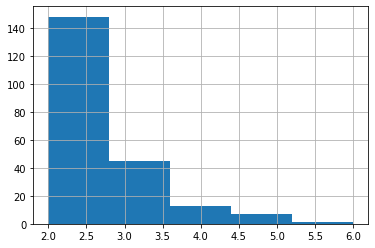

In [528]:
courierA[courierA.batched_with_order_id > 0]['order_id'].hist(bins = 5)

In [529]:
courierA_group = courierA.groupby('order_id').agg({'order_id': 'count'})
courierA_group.columns = ['order_id_count']

In [530]:
courierA_group_batched_with_order_id = courierA[courierA.batched_with_order_id > 0].groupby('order_id').agg({'batched_with_order_id': 'count'})

In [531]:
courierA_group = courierA_group.merge(courierA_group_batched_with_order_id, how='left', on = 'order_id')

In [532]:
courierA_group = courierA_group.fillna(0)

In [533]:
courierA_group['share_batched_with_order_id'] = courierA_group.batched_with_order_id / courierA_group.order_id_count

In [534]:
courierA_group 

,order_id_count,batched_with_order_id,share_batched_with_order_id
order_id,,,
1,2400,0.0,0.000000
2,614,148.0,0.241042
3,156,45.0,0.288462
4,33,13.0,0.393939
5,11,7.0,0.636364
6,3,1.0,0.333333
7,1,0.0,0.000000
22,1,0.0,0.000000
28,1,0.0,0.000000


Вывод
-----

 Наличие мультипоставок зависит от количества заказов, которые выполняет курьер за сутки: Наилучший % имеют курьеры, которые поставляют 5 поставок, затем 4 заказа, затем, 6 заказов, затем 3 и 2 заказов.

# 4.Проанализируем поставки в разрезе рестаранов

In [535]:
restA = dfA.groupby(['day', 'rest_id']).agg({'order_id': 'count', 'batched_with_order_id': 'count'}).reset_index()

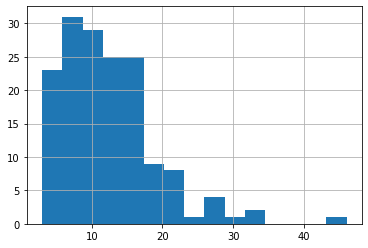

In [536]:
restA[restA.batched_with_order_id > 0]['order_id'].hist(bins = 15)

In [537]:
restA_group = restA.groupby('order_id').agg({'order_id': 'count'})
restA_group.columns = ['order_id_count']

In [538]:
restA_group_batched_with_order_id = restA[restA.batched_with_order_id > 0].groupby('order_id').agg({'batched_with_order_id': 'count'})

In [539]:
restA_group = restA_group.merge(restA_group_batched_with_order_id, how='left', on = 'order_id')
restA_group = restA_group.fillna(0)

In [540]:
restA_group['share_batched_with_order_id'] = restA_group.batched_with_order_id / restA_group.order_id_count

In [541]:
restA_group

,order_id_count,batched_with_order_id,share_batched_with_order_id
order_id,,,
1,79,0.0,0.000000
2,61,0.0,0.000000
3,49,4.0,0.081633
4,70,5.0,0.071429
5,66,14.0,0.212121
6,54,3.0,0.055556
7,48,14.0,0.291667
8,38,14.0,0.368421
9,31,15.0,0.483871


Вывод
------

Чем больше число выполняемых заказов в рестаранах в сутки, тем больше доля числа заказов, выполняемых совместно

# 5. Расчитать разницу времени между поступлением заказов

In [542]:
dfA_1 = dfA.sort_values(by = ['rest_id', 'order_created_datetime'])
dfA_1 = dfA_1.reset_index()

In [543]:
date_difA = dfA_1.groupby(['rest_id']).agg({'order_created_datetime': 'diff'}).reset_index()
date_difA.columns = ['index', 'delta_time']

In [544]:
date_difA.head()

,index,delta_time
0,0,NaT
1,1,00:11:23
2,2,00:18:44
3,3,00:03:45
4,4,00:18:32


In [545]:
dfA_1 = dfA_1.merge(date_difA, how = 'left', on = 'index')

In [553]:
dfA_1.head()

,index,order_created_datetime,brand_name,rest_id,batched_with_order_id,order_id,first_in_multiorder_flg,courier_id,order_items_cnt,city,day,hour,delta_time
0,25046,2015-09-13 11:24:24,A,03e61cfb9d3325c7c88accd2b3cfa2be,NaN,96abdf37ff71f3ab4cbb1cfcb43a9a3d,NaN,2af733d3c98db5226871a158d36d999d,1,e6705560085199e9674cd721ee844d0d,13,11,NaT
1,25225,2015-09-13 11:35:47,A,03e61cfb9d3325c7c88accd2b3cfa2be,NaN,399ceb9a041df0a338ecdfcccd4309f4,NaN,2c836ec50a9e78259de02aff97fa0da9,6,e6705560085199e9674cd721ee844d0d,13,11,NaT
2,25294,2015-09-13 11:54:31,A,03e61cfb9d3325c7c88accd2b3cfa2be,e0c4053a9330db0c071077c417a186fc,87b092f55dca7eafdcfff64c80b22c89,1.0,4e3243405d91b074e142849272d56ea8,6,e6705560085199e9674cd721ee844d0d,13,11,NaT
3,25007,2015-09-13 11:58:16,A,03e61cfb9d3325c7c88accd2b3cfa2be,87b092f55dca7eafdcfff64c80b22c89,e0c4053a9330db0c071077c417a186fc,0.0,4e3243405d91b074e142849272d56ea8,4,e6705560085199e9674cd721ee844d0d,13,11,NaT
4,24839,2015-09-13 12:16:48,A,03e61cfb9d3325c7c88accd2b3cfa2be,NaN,2e34f208af9e41fd66cbf7b9d91c253a,NaN,2c836ec50a9e78259de02aff97fa0da9,5,e6705560085199e9674cd721ee844d0d,13,12,NaT
